In [1]:
import torch
import glob
from toro.utils.datasets.RawStreamData import RawStreamDS
from toro.utils.functions_SX import get_ideal_basis, print_solution
import torch
import numpy as np

from tqdm import tqdm
from torch.utils.data import DataLoader, Subset, ConcatDataset
from toro.models.indexer_model import ToroIndexer

import lovely_tensors as lt

lt.monkey_patch()

import os

cwd = os.getcwd()

# streams_path = cwd+"/../data/lyso"
streams_path = cwd+"/../data/performance_test"
mylist = glob.glob(streams_path + '/*.stream', recursive=True)
path = mylist[0]

mds = RawStreamDS(path, sequence_length=200, no_padding=True)

Creating DS from  /Users/lfbarba/GitHub/toro-indexer-for-serial-crystallography/notebooks/../data/performance_test/Lyso_lbinsane_noall_1_cpu.stream


# Visualize results from stream_file_indexer.py

To generate the solution files, run first *python stream_file_indexer.py*

In [2]:
from torch.nn.functional import normalize
import math

def compute_angles(bases):
    """
    Computes the angles between the vectors of 3x3 bases. this is use to compute the quality of solution bases.
    @param bases: A tensor of shape bs, 3, 3 with bs bases
    @return: The angles alpha, beta and gamma between the consecutive vectors.
    """
    bases = normalize(bases, dim=-1)
    alpha = torch.acos(torch.sum(bases[0] * bases[1], dim=-1)) * 180 / math.pi
    beta = torch.acos(torch.sum(bases[0] * bases[2], dim=-1)) * 180 / math.pi
    gamma = torch.acos(torch.sum(bases[1] * bases[2], dim=-1)) * 180 / math.pi
    return torch.stack([alpha, beta, gamma], 0)


indices = np.load("../solution_indices.npy")
bases = np.load("../solution_matrices.npy")

len(indices)

1162

norm solution  tensor[3] x∈[37.742, 78.488] μ=64.877 σ=23.500 [78.401, 78.488, 37.742]
angles solution  tensor[3] x∈[90.002, 90.169] μ=90.067 σ=0.089 [90.002, 90.030, 90.169]
cell_parameters  [78.3  78.3  37.96 90.   90.   90.  ]


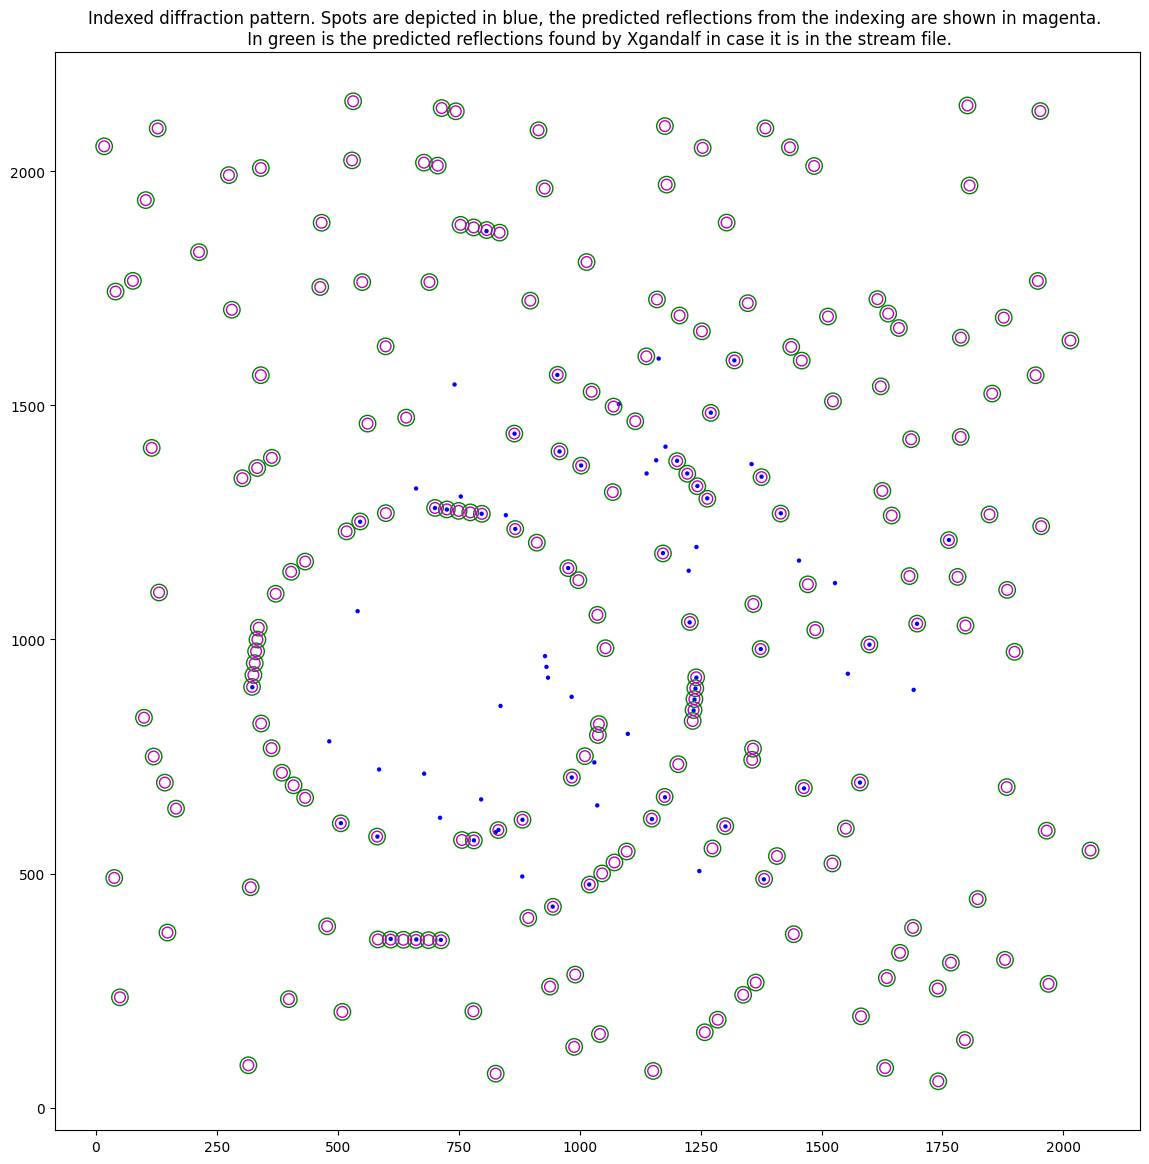

In [3]:
import random
idx = random.randint(0, len(indices) - 1)
mds_idx = indices[idx]
print("norm solution ", torch.FloatTensor(bases[idx]).norm(dim=-1))
print("angles solution ", compute_angles(torch.tensor(bases[idx])))
cell_parameters = mds.instances[mds_idx]['initial_cell']
print("cell_parameters ", cell_parameters)
initial_cell = get_ideal_basis(cell_parameters)
print_solution(torch.FloatTensor(bases[idx]), mds_idx, mds, initial_cell)
